Player First Name: Sidney
Player Last Name: Crosby
Post Season y/n: n
Inputs: sidney crosby
https://puckbase.com/stats/event-log?player=sidney-crosby&type=faceoffs&&format=csv
   Opponent Result  Faceoffs
0       ANA   lost        14
1       ANA    won        16
2       ARI   lost        11
3       ARI    won        26
4       BOS   lost        32
5       BOS    won        44
6       BUF   lost        18
7       BUF    won        29
8       CAR   lost        40
9       CAR    won        64
10      CBJ   lost        39
11      CBJ    won        45
12      CGY   lost        25
13      CGY    won        20
14      CHI   lost        23
15      CHI    won        20
16      COL   lost        18
17      COL    won        32
18      DAL   lost        21
19      DAL    won        13
20      DET   lost        27
21      DET    won        56
22      EDM   lost        15
23      EDM    won        27
24      FLA   lost        30
25      FLA    won        36
26      LAK   lost        20
27      LAK 

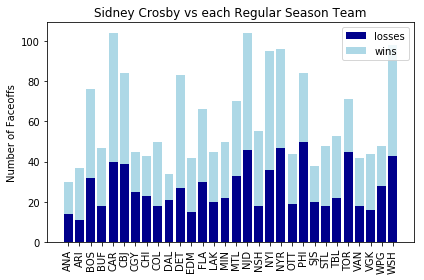

Which Team? WSH


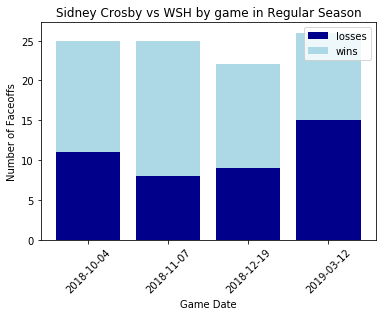

Result   Game date  lost  won  total  percent_win
0       2018-10-04    11   14     25     0.560000
1       2018-11-07     8   17     25     0.680000
2       2018-12-19     9   13     22     0.590909
3       2019-03-12    15   11     26     0.423077
Result    Face-off opponent  lost   won
0            Brett Connolly   0.0   1.0
1       Chandler Stephenson   0.0   2.0
2          Evgeny Kuznetsov   3.0   8.0
3                Lars Eller   6.0  14.0
4                  Nic Dowd   4.0   4.0
Result  index    Face-off opponent  lost   won  total  percent_win
0           5    Nicklas Backstrom  30.0  22.0   52.0     0.423077
1           3           Lars Eller   6.0  14.0   20.0     0.700000
2           2     Evgeny Kuznetsov   3.0   8.0   11.0     0.727273
3           4             Nic Dowd   4.0   4.0    8.0     0.500000
4           1  Chandler Stephenson   0.0   2.0    2.0     1.000000
5           6           T.J. Oshie   0.0   2.0    2.0     1.000000
6           0       Brett Connolly   0.0 

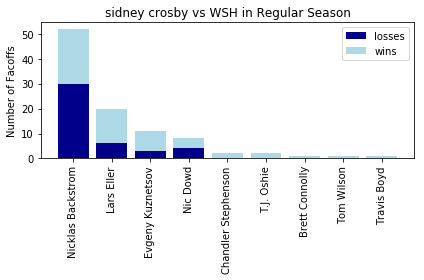

In [9]:
#!/usr/bin/env python2
# -*- coding: utf-8 -*-
"""
Created on Sun May  6 08:18:50 2018

@author: Anthony
"""
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import urllib2

first = raw_input('Player First Name: ')
last = raw_input('Player Last Name: ')
post_season = raw_input('Post Season y/n: ')

first = first.lower()
last = last.lower()
post_season = post_season.lower()

print("Inputs: " + first +" "+last)

url_add = ''
if post_season == 'y': 
    url_add = 'season=3'
    season = 'Post Season'
else:
    url_add= ''
    season='Regular Season'
url_1 = 'https://puckbase.com/stats/event-log?player='+first+'-'+last+'&type=faceoffs&'+url_add+'&format=csv'
print(url_1)
csv_url_1 = urllib2.urlopen(url_1)
df = pd.read_csv (csv_url_1,skiprows=4)

df['Faceoffs'] = df.index
df_opponents = df.groupby(['Opponent','Result'])['Faceoffs'].nunique().reset_index()

df_opponents_pivot = df_opponents.pivot(columns ='Result', index = 'Opponent', values = 'Faceoffs').reset_index()
df_opponents_pivot['total']=df_opponents_pivot.won+df_opponents_pivot.lost
df_opponents_pivot['percentage']=df_opponents_pivot.won/df_opponents_pivot.total
#df_opponents_pivot = df_opponents_pivot.sort_values('percentage', ascending=False).reset_index()
print(df_opponents)
print(df_opponents_pivot)
plt.bar(df_opponents_pivot.Opponent,df_opponents_pivot.lost,color='darkblue',label='losses')
plt.bar(df_opponents_pivot.Opponent,df_opponents_pivot.won,bottom=df_opponents_pivot.lost,color = 'lightblue',label = 'wins')
print(df.head())
plt.legend()
plt.title(first.capitalize() + ' ' + last.capitalize() + ' vs each '+ season+' Team')
plt.ylabel('Number of Faceoffs')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig(last+'_vs_'+ 'team.png')
plt.show()


team = raw_input('Which Team? ')
df_team = df[df.Opponent == team]
df_bygame = df_team.groupby(['Game date','Result'])['Faceoffs'].nunique().reset_index()


df_bygame_pivot = df_bygame.pivot(columns='Result',index = 'Game date', values = 'Faceoffs').reset_index()
df_bygame_pivot['total'] = df_bygame_pivot.lost+df_bygame_pivot.won
df_bygame_pivot = df_bygame_pivot.fillna(0)
df_bygame_pivot['percent_win'] = df_bygame_pivot.won/df_bygame_pivot.total
plt.bar(df_bygame_pivot['Game date'], df_bygame_pivot.lost,color='darkblue',label='losses')
plt.bar(df_bygame_pivot['Game date'], df_bygame_pivot.won,bottom=df_bygame_pivot.lost, color = 'lightblue',label='wins')
plt.title(first.capitalize() + ' ' + last.capitalize() + ' vs ' + team + ' by game in ' + season)
plt.ylabel('Number of Faceoffs')
plt.xlabel('Game Date')
plt.xticks(rotation=45)
plt.legend()
plt.show()
print(df_bygame_pivot)

df_faceoff = df_team.groupby(['Face-off opponent','Result'])['Faceoffs'].nunique().reset_index()
df_faceoff_pivot = df_faceoff.pivot(columns='Result',index = 'Face-off opponent',values = 'Faceoffs').reset_index()
df_faceoff_pivot = df_faceoff_pivot.fillna(0)
print(df_faceoff_pivot.head())
df_faceoff_pivot['total'] = df_faceoff_pivot.lost+df_faceoff_pivot.won
df_faceoff_pivot['percent_win'] = df_faceoff_pivot.won/df_faceoff_pivot.total
df_faceoff_pivot = df_faceoff_pivot.sort_values('total', ascending = False).reset_index()
plt.bar(df_faceoff_pivot['Face-off opponent'],df_faceoff_pivot.lost,color='darkblue',label='losses')
plt.bar(df_faceoff_pivot['Face-off opponent'],df_faceoff_pivot.won,bottom=df_faceoff_pivot.lost,color='lightblue',label = 'wins')
plt.legend()
plt.title(first + ' ' + last + ' vs ' + team + ' in '+season)
plt.ylabel('Number of Facoffs')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig(last+'.png')
print(df_faceoff_pivot)
